In [1]:
from __future__ import print_function
import os
import sys
import cv2
from matplotlib import pyplot as plt
import numpy as np

from local_config import CURRENT_DIR
sys.path.append(os.path.join(CURRENT_DIR, ".."))

try:
    from config import Config
    from data_loader import WaymoStixelDataset
except:
    print("failed to load module")
    
from albumentations import (
    Resize,
    Compose,
    CLAHE,
    HueSaturationValue,
    RandomBrightness,
    RandomContrast,
    RandomGamma,
    ToFloat,
    Normalize,
    GaussNoise,
    RandomShadow,
    RandomRain,
)

import utility
import importlib

In [4]:
dt_config = Config()
dt_config.display()


Configurations:
CURRENT_DIR                    /pfs/data5/home/es/es_es/es_menzweil/StixelNet/obstacle_detection_stixelnet
DATA_PATH                      /pfs/data5/home/es/es_es/es_menzweil/StixelNet/obstacle_detection_stixelnet/data/StixelNet_Waymo
GROUND_TRUTH_PATH              /pfs/data5/home/es/es_es/es_menzweil/StixelNet/obstacle_detection_stixelnet/data/StixelNet_Waymo/waymo_train.txt
NUM_EPOCHS                     50
SAVED_MODELS_PATH              saved_models_l2




In [5]:
## Train set

import importlib
import sys
importlib.reload(sys.modules['data_loader'])
from data_loader import WaymoStixelDataset

train_aug = Compose(
    [
        GaussNoise(p=1.0),
        RandomShadow(p=0.5),
        RandomRain(p=0.5, rain_type="drizzle"),
        RandomContrast(limit=0.2, p=0.5),
        RandomGamma(gamma_limit=(80, 120), p=0.5),
        RandomBrightness(limit=0.2, p=0.5),
        HueSaturationValue(
            hue_shift_limit=5, sat_shift_limit=20, val_shift_limit=10, p=0.5
        ),
        CLAHE(p=0.5, clip_limit=2.0),
        Normalize(p=1.0),
    ]
)
    

train_set = WaymoStixelDataset(
        data_path=dt_config.DATA_PATH,
        ground_truth_path=dt_config.GROUND_TRUTH_PATH,
        batch_size=4,
        transform=None,
        customized_transform=utility.HorizontalFlip(p=0.5),
    )


X,y = train_set[0]

print(np.shape(X))
print(np.shape(y))


(4, 1280, 1920, 3)
(4, 240)


In [6]:
imgs, labels = train_set[3]
print(np.shape(imgs))
print(np.shape(labels))



(4, 1280, 1920, 3)
(4, 240)


(4, 1280, 1920, 3)
(4, 240)
[6.06250e-01 6.50000e-01 6.37500e-01 6.50000e-01 6.50000e-01 6.37500e-01
 6.06250e-01 7.81250e+05 6.31250e-01 6.31250e-01 6.31250e-01 6.31250e-01
 6.31250e-01 6.25000e-01 6.18750e-01 6.18750e-01 6.18750e-01 7.81250e+05
 6.34375e-01 7.81250e+05 6.40625e-01 7.81250e+05 6.43750e-01 7.81250e+05
 6.62500e-01 7.81250e+05 6.40625e-01 7.81250e+05 7.09375e-01 7.81250e+05
 6.81250e-01 7.81250e+05 6.93750e-01 7.21875e-01 7.56250e-01 7.81250e+05
 7.68750e-01 7.78125e-01 6.56250e-01 7.81250e+05 6.75000e-01 7.81250e+05
 7.81250e+05 7.81250e+05 7.81250e+05 6.00000e-01 7.81250e+05 6.25000e-01
 6.15625e-01 6.00000e-01 7.81250e+05 6.00000e-01 5.96875e-01 6.06250e-01
 7.81250e+05 6.06250e-01 6.06250e-01 5.81250e-01 7.81250e+05 6.06250e-01
 6.06250e-01 6.06250e-01 5.87500e-01 7.81250e+05 6.06250e-01 6.06250e-01
 6.06250e-01 6.00000e-01 5.93750e-01 6.00000e-01 6.00000e-01 7.81250e+05
 6.06250e-01 6.06250e-01 6.06250e-01 6.03125e-01 6.12500e-01 6.12500e-01
 7.81250e+05 6.06250e-0

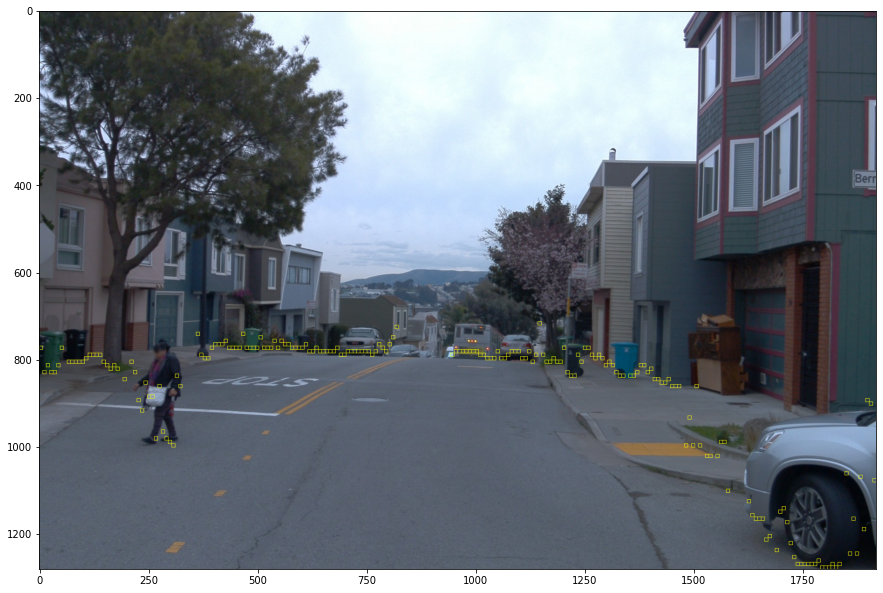

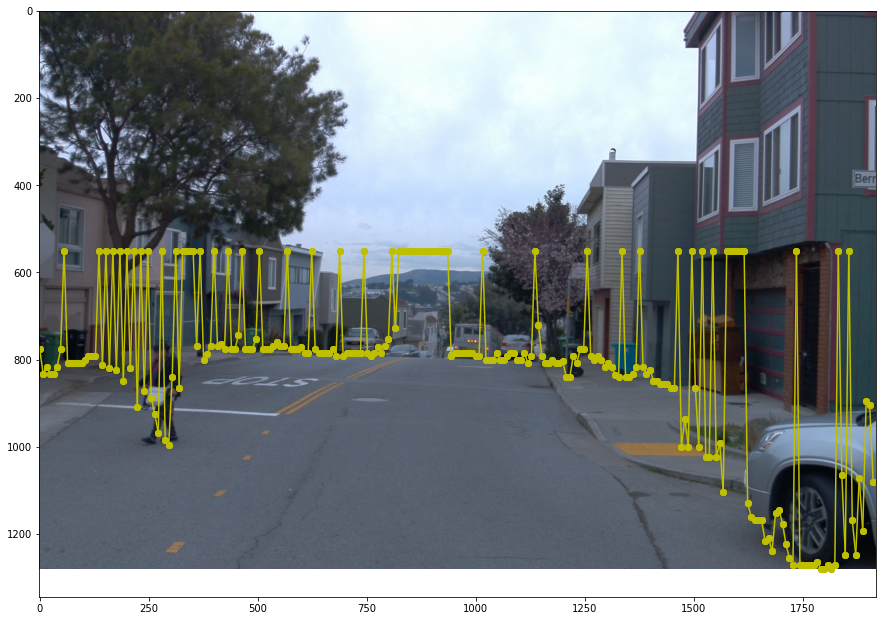

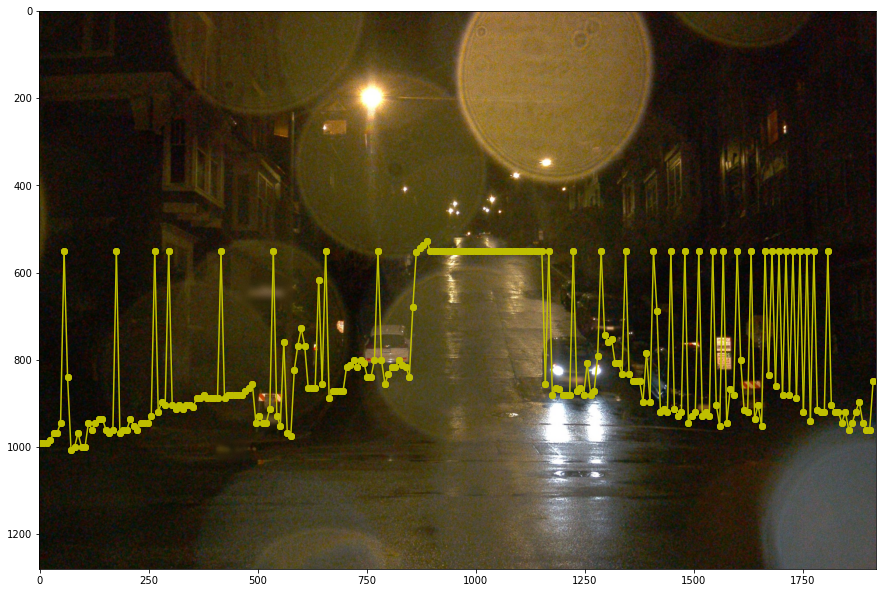

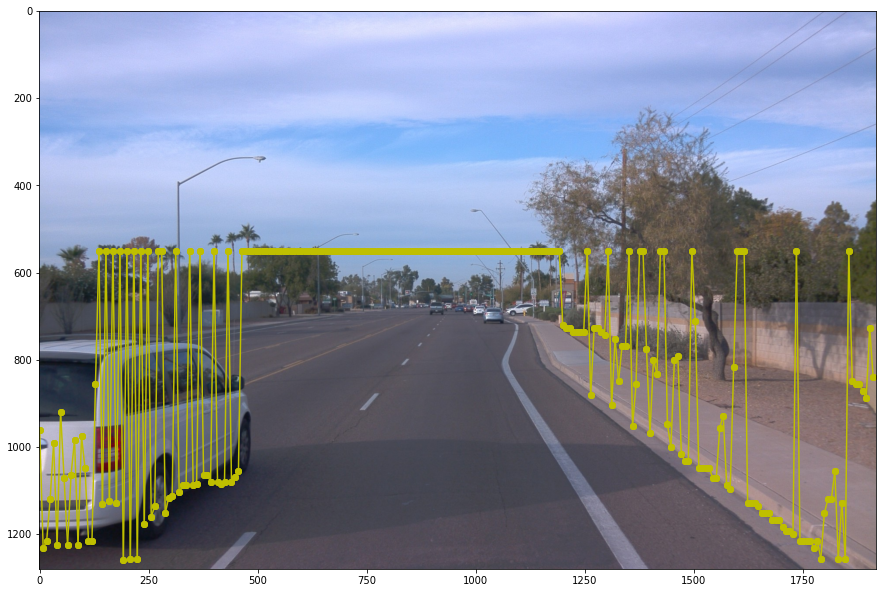

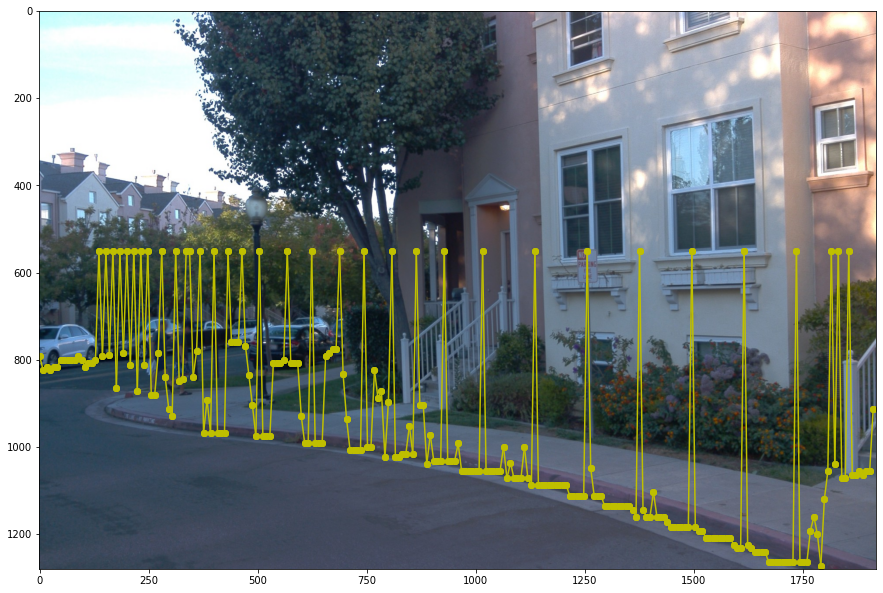

In [12]:
idx = 3

imgs, labels = train_set[idx]
print(np.shape(imgs))
print(np.shape(labels))

visualized_stixel = train_set.visualize_one_image(idx)

plt.figure(figsize=(15,15))
plt.imshow(cv2.cvtColor(visualized_stixel, cv2.COLOR_BGR2RGB))
#cv2.imwrite("test.jpg", visualized_stixel)


for b in range(train_set.batch_size):

    batchImg = imgs[b]
   
    batchLabels = labels[b] * batchImg.shape[0]
    print(labels[b])
    batchLabels[batchLabels >= 1000000000.0] = train_set._horizonYCoord

    print(np.shape(batchImg))
    print(np.shape(batchLabels))

    plt.figure(figsize=(15,15))
    plt.imshow(cv2.cvtColor(batchImg, cv2.COLOR_BGR2RGB))
    #labels = positions[0,:,1]

    origImageWidth = batchImg.shape[1]
    labelWidth = batchLabels.size

    x = list(range(0, origImageWidth, int(origImageWidth/labelWidth)))
    print("x           : {}".format(np.shape(x)))
    print("batchLabels : {}".format(np.shape(batchLabels)))
    plt.plot(x, batchLabels, 'yo')
    for i in range(0, len(x), 1):
        plt.plot(x[i:i+2], batchLabels[i:i+2], 'y-o')


